<a href="https://colab.research.google.com/github/aqz84167/AI-and-Security/blob/master/G-Code%20%E8%A8%BB%E8%A7%A3/Keras_Cifar_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Library

In [0]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

#### load data 加載數據

In [18]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 38s 0us/step


 #### Cifar-10 資料集包含訓練集 50000 筆, 測試集 10000 筆. 其中圖片是以三維陣列儲存的 32x32 解析度的 RGB 三原色數字影像, 索引存取方式為 [i][j][k], 第一維 i 表示圖片編號, 範圍 0~49999 共 5 萬張; 第二維 j 表示圖片的畫素列編號, 範圍 0~31 共 32 列, 第 3 維 k 代表行編號, 實際上儲存的是每一個畫素的 RGB 三原色的 1x3 行向量, 每一種顏色數值範圍 0~255.

In [19]:
print("train data:",'images:',x_img_train.shape,       #顯示訓練集圖片之 shape
      " labels:",y_label_train.shape)                  #顯示訓練集圖片之 shape
print("test  data:",'images:',x_img_test.shape ,       #測試集標籤為5萬筆 0~9 數字
      " labels:",y_label_test.shape)                   #測試集標籤為1萬筆 0~9 數字

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


#### 將輸入從0-255標準化為0.0-1.0 , 數據作為整數加載，必須將其轉換為浮點值才能執行除法

In [0]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

####標籤的預處理對於類別型變數而言其實就是進行 Onehot (獨熱) 編碼

In [0]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)   #訓練集標籤
y_label_test_OneHot = np_utils.to_categorical(y_label_test)     #測試集標籤

In [22]:
y_label_test_OneHot.shape

(10000, 10)

#### 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

#### 最簡單的線性、從頭到尾的結構順序，不分叉

In [0]:
model = Sequential()

#### 建立線性堆疊模型, 加入兩層卷積 (丟棄 25% 神經元) + 池化層 :
(卷積層1)

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

####卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#### 建立分類模型 (MLP) : 平坦層 + 隱藏層 (1024 神經元) + 輸出層 (10 神經元)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [34]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

####載入之前訓練的模型

In [35]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


####訓練模型

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [37]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 159s 4ms/step - loss: 1.5020 - acc: 0.4594 - val_loss: 1.2839 - val_acc: 0.5789
Epoch 2/10
40000/40000 [==============================] - 158s 4ms/step - loss: 1.1383 - acc: 0.5946 - val_loss: 1.1032 - val_acc: 0.6383
Epoch 3/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.9834 - acc: 0.6541 - val_loss: 1.0102 - val_acc: 0.6680
Epoch 4/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.8767 - acc: 0.6891 - val_loss: 0.9495 - val_acc: 0.6932
Epoch 5/10
40000/40000 [==============================] - 160s 4ms/step - loss: 0.7873 - acc: 0.7213 - val_loss: 0.8948 - val_acc: 0.6991
Epoch 6/10
40000/40000 [==============================] - 160s 4ms/step - loss: 0.7037 - acc: 0.7528 - val_loss: 0.8254 - val_acc: 0.7285
Epoch 7/10
40000/40000 [==============================] - 160s 4ms/step - loss: 0.6277 - acc: 0.7792 - val_loss: 0.8273 - 

####繪製訓練結果

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

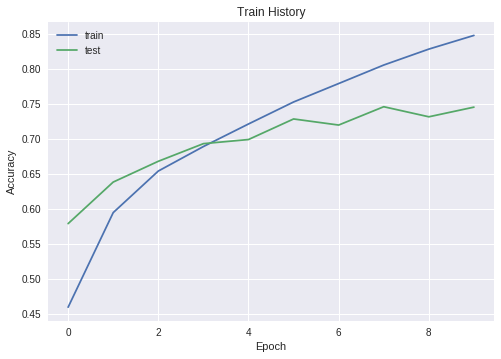

In [39]:
show_train_history('acc','val_acc') #訓練成功

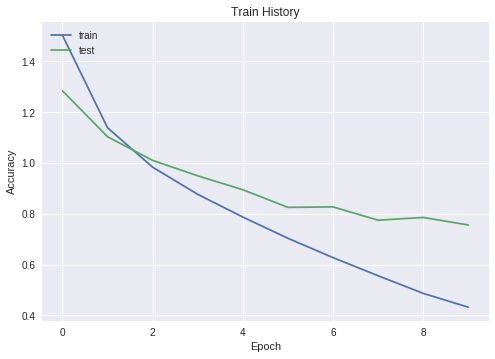

In [40]:
show_train_history('loss','val_loss')  #訓練失敗

####評估模型準確率

In [41]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7386

#### 進行預測

In [0]:
prediction=model.predict_classes(x_img_test_normalize)

In [44]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

#### 查看預測結果

In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

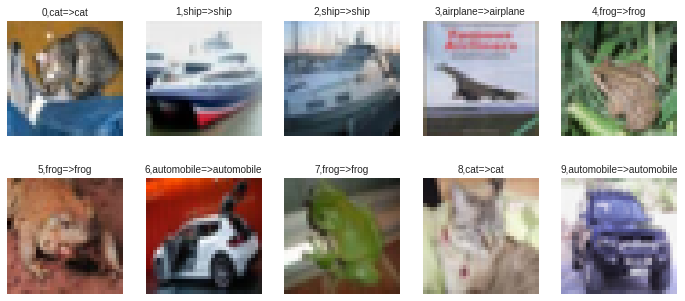

In [47]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

#### 查看預測機率

In [0]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [0]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


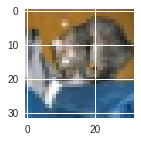

airplane Probability:0.003362732
automobile Probability:0.001905900
bird Probability:0.005802602
cat Probability:0.638307273
deer Probability:0.005415224
dog Probability:0.292913109
frog Probability:0.028793929
horse Probability:0.003178104
ship Probability:0.018186573
truck Probability:0.002134506


In [50]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


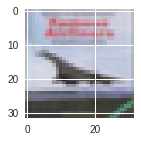

airplane Probability:0.529000640
automobile Probability:0.010225859
bird Probability:0.104856588
cat Probability:0.004399939
deer Probability:0.010628408
dog Probability:0.000137324
frog Probability:0.000388177
horse Probability:0.000228894
ship Probability:0.339405119
truck Probability:0.000728958


In [51]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

#### confusion matrix

In [52]:
prediction.shape

(10000,)

In [53]:
y_label_test.shape

(10000, 1)

In [54]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [55]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [56]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,807,3,56,15,15,2,19,7,59,17
1,21,820,18,12,6,9,15,8,28,63
2,61,1,614,44,112,62,74,20,9,3
3,15,4,98,537,55,167,87,19,11,7
4,17,1,69,48,748,27,58,23,9,0
5,11,1,69,156,48,640,36,32,5,2
6,2,4,38,36,21,16,878,2,3,0
7,14,1,42,44,70,60,12,751,4,2
8,47,24,27,18,9,13,9,1,842,10


In [57]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
